In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import process_SMHI_data as process_data
import meteorological_temporal_data as metdata
import seaborn as sns

# Read in and clean data

In [2]:
# def a plot function
def plot_function(df, rows, cols, fig_size,  y_labels, fig_path = None, savefig = False):
    fig, axes = plt.subplots(rows, cols, constrained_layout = True, figsize = fig_size)
    annots = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)']

    j = 0
    for i, ax in enumerate(fig.axes):
        df.iloc[:, j].plot(ax = ax, linewidth = .85) # linewidth default = 1.5
        ax.set_ylabel(y_labels)
        ax.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=2, borderaxespad=0.1)
        ax.annotate(annots[i], xy=(0.0, 1.09), xycoords="axes fraction")
        ax.set_xlabel('')
        j += 1
    if savefig:
        plt.savefig(fig_path)

In [3]:
# read in data and clean with import script
df = process_data.clean_and_merge_dframes('../air_weather_data/PM2.5/')

In [4]:
# stations was misspelled in SMHI data
df.rename(columns={'PM$_{2.5}$, Stockholm Torkel Knutssongatan':'PM$_{2.5}$, Stockholm Torkel Knutssonsgatan'}, 
               inplace=True)

In [5]:
df.describe().round(3)

,"PM2.5, Stockholm Torkel Knutssongatan","PM2.5, Sollentuna Ekmans Väg 11","PM2.5, Stockholm Hornsgatan 108","PM2.5, Sollentuna E4 Häggvik","PM2.5, Norr Malma"
count,57950.000,60330.000,60536.000,60784.000,59368.000
mean,4.674,5.279,6.135,5.311,3.913
std,4.162,4.666,4.693,4.718,4.148
min,-2.900,0.200,0.200,0.100,-3.000
25%,2.100,2.400,3.100,2.400,1.400
50%,3.500,4.000,4.900,3.900,2.900
75%,5.800,6.500,7.670,6.600,5.200
max,59.300,222.300,59.400,113.800,85.800


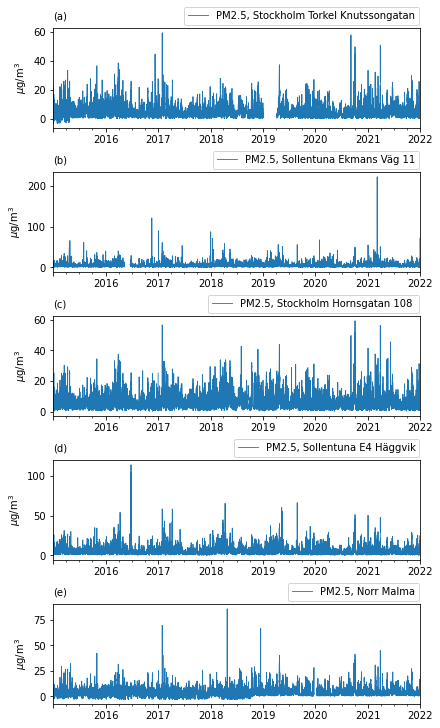

In [6]:
# plot raw PM10 data
plot_function(df, 5, 1, fig_size=(6,10), y_labels='$\mu$g/m$^3$')

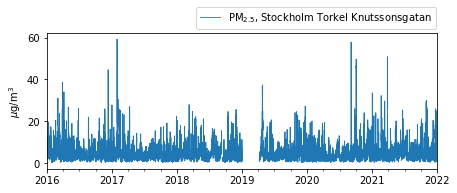

In [8]:
# plot only Torkel Knutssonsgatan station data
df['PM$_{2.5}$, Stockholm Torkel Knutssonsgatan']['2016-01-01 00:00:00':].plot(linewidth=.85, figsize=(7,2.5))
plt.ylabel('$\mu$g/m$^3$'), plt.xlabel('')
plt.legend(loc='lower right', bbox_to_anchor= (1.0, 1.025), ncol=2, borderaxespad=0.1)

In [11]:
# check zero or outlier values
np.sum(df >100) 

PM$_{2.5}$, Stockholm Torkel Knutssonsgatan    0
PM$_{2.5}$, Sollentuna Ekmans Väg 11           2
PM$_{2.5}$, Stockholm Hornsgatan 108           0
PM$_{2.5}$, Sollentuna E4 Häggvik              4
PM$_{2.5}$, Norr Malma                         0
dtype: int64

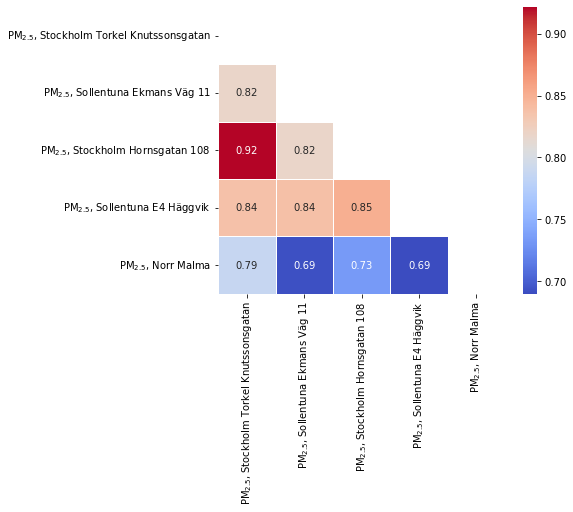

In [12]:
mat = df.corr()
mask = np.triu(np.ones_like(mat, dtype=bool))
fig, ax = plt.subplots(figsize = (8,7), constrained_layout = True)
ax = sns.heatmap(mat, mask=mask, annot = True, linewidths=0.5, fmt = ".2f", square=True, cmap='coolwarm')

In [13]:
# save cleaned dataframe
df.to_csv('../air_weather_data/PM2.5_all_stations_cleaned.csv')